## sklearn machine learning library
### classification algorithms
### **KNN** (k-nearest neighbors)
### **Machine Learning - K-nearest neighbors (KNN)**
- **KNN** is a **supervised machine learning** algorithm for classifying data points ( *observations*),  
based on the values of the closest existing points
- **k** is the number of nearby points -- neighbors -- to use in the comparison
- **k** is often set to 5, but 3 is also commonly used. 1 is considered too low





In [ ]:
# 1. import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# 2. import machine learning modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

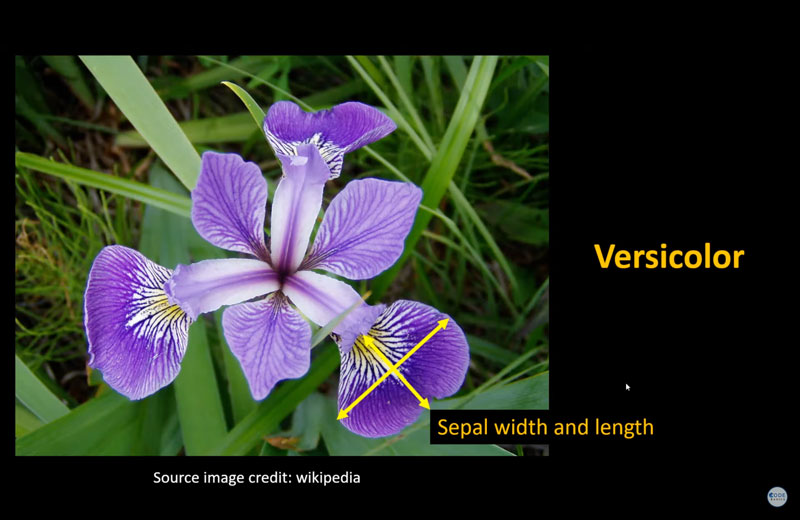

In [ ]:
# 3. Output image: 
# "iris-sepal-width-height-wikipedia.jpg"
# Im

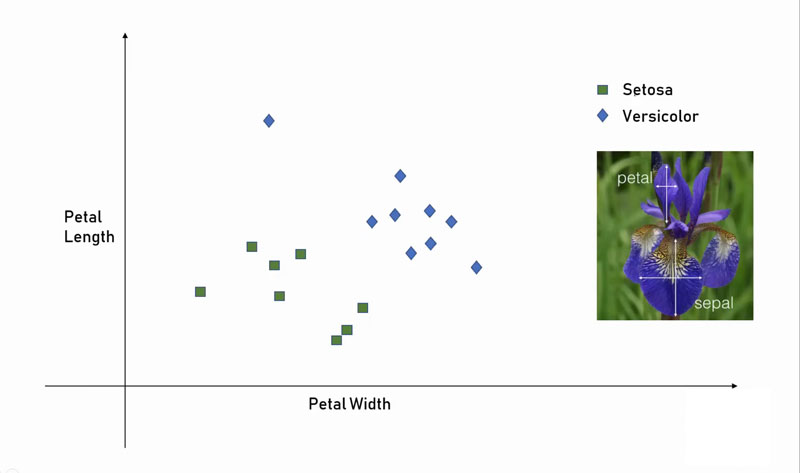

In [ ]:
# 4. Display another image
# 'iris-sepal-width-vs-height-plot.jpg'

In [ ]:
# 5. instantiate the load_iris() method, saving result to a variable
iris = load_iris()
print(type(iris)) # <class 'sklearn.utils._bunch.Bunch'>

# 6. Load the iris dataset:
iris_data = iris.data

# 7. Check the data type, length, first 5 results and shape of iris_data:
print(type(iris_data)) # <class 'numpy.ndarray'>
print(len(iris_data)) # 150
print(iris_data[:5])
print(iris_data.shape) # (150, 4)
# [[5.1 3.5 1.4 0.2]
#  [4.9 3.  1.4 0.2]
#  [4.7 3.2 1.3 0.2]
#  [4.6 3.1 1.5 0.2]
#  [5.  3.6 1.4 0.2]]
# [5.1 3.5 1.4 0.2]

# 8. Drill deeper: check the first item at index 0 in iris_data:
print(iris_data[0]) # [5.1 3.5 1.4 0.2]
print(len(iris_data[0])) # 4
print(iris_data[0].shape) # (4,)
print(type(iris_data[0])) # <class 'numpy.ndarray'>
print(iris_data[0,0]) # 5.1
print(iris_data[0,0].shape) # ()
print(type(iris_data[0,0])) # float

<class 'sklearn.utils._bunch.Bunch'>
<class 'numpy.ndarray'>
150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 4)
[5.1 3.5 1.4 0.2]
4
(4,)
<class 'numpy.ndarray'>
5.1
()
<class 'numpy.float64'>


In [ ]:
# 9. Get the features, that is the column names if we make a df from the data:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# 10. Make a df from the iris data, using the feature_names as the column names:
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)
print(iris_df.shape) # (150, 4)
iris_df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 11. Print the iris species names, as stored in the target_names list:
print(iris.target_names) # ['setosa' 'versicolor' 'virginica']

# 12. Print the target values: 150 0's, 1's and 2's, which correspond to the 3 species:
print(iris.target)
# the target values of 0, 1 and 2 correspond to the 3
# irises species: 'setosa', 'versicolor', 'virginica'
# 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#  0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 13. Declare a new column, 'target' the value of which is the 150-item target:
# array of 0's, 1's and 2's
iris_df['target'] = iris.target

In [ ]:
# 14. Output the updated df, now with 'target' column:
print(iris_df.shape) # (150,5)
iris_df.sample(5)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
19,5.1,3.8,1.5,0.3,0
52,6.9,3.1,4.9,1.5,1
36,5.5,3.5,1.3,0.2,0
62,6.0,2.2,4.0,1.0,1
106,4.9,2.5,4.5,1.7,2


#### making a 'species' column using apply(lambda)

In [ ]:
# 15. Declare a 'species' column using apply(lambda)
#     apply(lambda) is called on the 'target' column, which has values of 0,1,2
#     - lambda input (argument) is the target number, as t [0,1,2]
#     - lambda output (return value) is the item in target_names list at index t
#       output (return value) is 'setosa', 'versicolor' or 'virginica'
#       output value is saved as the value for the 'species' column at that row
iris_df['species'] = iris_df['target'].apply(lambda t : iris.target_names[t])

In [ ]:
# 16. Output the updated df, now with 'species' column:
print(iris_df.shape) # (150, 6)
iris_df.sample(3)

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
90,5.5,2.6,4.4,1.2,1,versicolor
114,5.8,2.8,5.1,2.4,2,virginica
122,7.7,2.8,6.7,2.0,2,virginica


In [ ]:
# 17. Declare another new column for total cm
#     no lambda for this -- just vector operation (basic arithmetic)
iris_df['total cm'] = iris_df['sepal length (cm)'] + iris_df['sepal width (cm)'] + iris_df['petal length (cm)'] + iris_df['petal width (cm)']

In [ ]:
# 18. Output the updated df, now with 'total cm' column:
print(iris_df.shape) # (150, 7)
iris_df.sample(3)

(150, 7)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm
136,6.3,3.4,5.6,2.4,2,virginica,17.7
79,5.7,2.6,3.5,1.0,1,versicolor,12.8
23,5.1,3.3,1.7,0.5,0,setosa,10.6


**Add a 'size' column with value based on 'total cm':**
- 'small' - 'total cm' less than 10
- 'medium' - 'total cm' is 10-14.99
- 'large' - 'total cm' is 15.0 and up

In [ ]:
#  19. Use apply(lambda) with if-else to conditionally set the 'size' value: 
iris_df['size'] = iris_df['total cm'].apply(lambda n : 'small' if n<10 else 'medium' if n<15 else 'large')

In [ ]:
# 20. Output the updated df, now with 'size' column:
print(iris_df.shape) # (150, 8)
iris_df.sample(3)

(150, 8)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm,size
53,5.5,2.3,4.0,1.3,1,versicolor,13.1,medium
105,7.6,3.0,6.6,2.1,2,virginica,19.3,large
32,5.2,4.1,1.5,0.1,0,setosa,10.9,medium


In [ ]:
# 21. Make a df of just the rows where target is 0
# which is 'setosa':
setosa_df = iris_df[ iris_df['species'] == 'setosa' ]

In [18]:
print(setosa_df.shape) # (50, 8)
setosa_df.head()

(50, 8)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm,size
0,5.1,3.5,1.4,0.2,0,setosa,10.2,medium
1,4.9,3.0,1.4,0.2,0,setosa,9.5,small
2,4.7,3.2,1.3,0.2,0,setosa,9.4,small
3,4.6,3.1,1.5,0.2,0,setosa,9.4,small
4,5.0,3.6,1.4,0.2,0,setosa,10.2,medium


In [ ]:
# 22. Get just the top 10 total cm (10 biggest flowers)
# sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
iris_df.sort_values(by='total cm', ascending=False)[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm,size
117,7.7,3.8,6.7,2.2,2,virginica,20.4,large
131,7.9,3.8,6.4,2.0,2,virginica,20.1,large
118,7.7,2.6,6.9,2.3,2,virginica,19.5,large
109,7.2,3.6,6.1,2.5,2,virginica,19.4,large
105,7.6,3.0,6.6,2.1,2,virginica,19.3,large
122,7.7,2.8,6.7,2.0,2,virginica,19.2,large
135,7.7,3.0,6.1,2.3,2,virginica,19.1,large
107,7.3,2.9,6.3,1.8,2,virginica,18.3,large
143,6.8,3.2,5.9,2.3,2,virginica,18.2,large
125,7.2,3.2,6.0,1.8,2,virginica,18.2,large


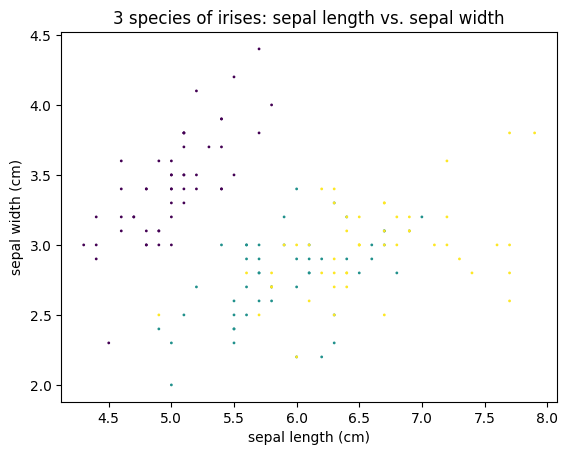

In [ ]:
# 23. Plot all 150 flowers in 3 classes [0,1,2]
# plot just the sepal length as x vs. sepal width as y
# target column supplies the classes

x = iris_df['sepal length (cm)']
y = iris_df['sepal width (cm)']
# print(len(x))
# 'target' # [0,1,2]
classes = iris.target
plt.scatter(x,y,c=classes,s=5)
plt.title("3 species of irises: sepal length vs. sepal width")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

**Sepal length vs Sepal Width (Virginica vs Versicolor)**

100


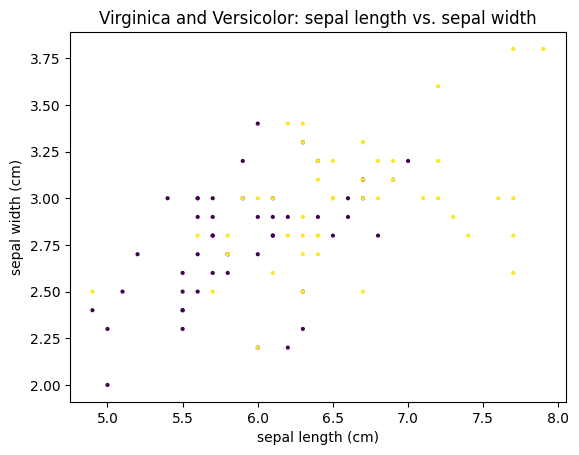

In [ ]:
# 24. Plot the sepal length vs width
not_setosa_df = iris_df[ iris_df['species'] != 'setosa' ]
x = not_setosa_df['sepal length (cm)']
y = not_setosa_df['sepal width (cm)']
print(len(x))
# 'target' # [0,1,2]
classes =  not_setosa_df['target']
plt.scatter(x,y,c=classes,s=4)
plt.title("Virginica and Versicolor: sepal length vs. sepal width")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

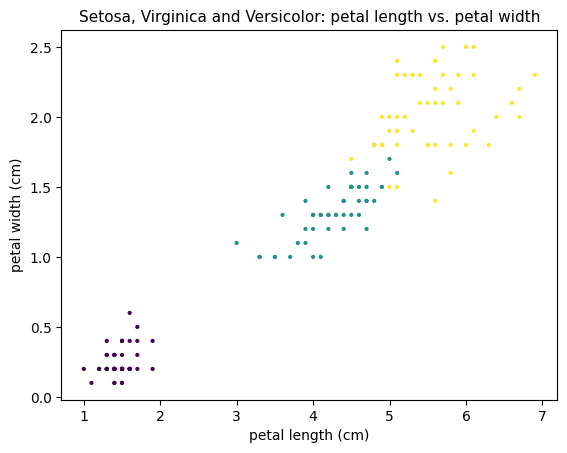

In [ ]:
# 25. Modify the code to plot the petal length vs width
# for all 3 species
x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']
classes =  iris_df['target']
plt.scatter(x,y,c=classes,s=4)
plt.title("Setosa, Virginica and Versicolor: petal length vs. petal width", fontsize=11)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [ ]:
# 26. Make a crosstab df where:
#    - 'size' is index (row) names
#    - 'species' is column names

# result should be a 3x3 df where:
# row names are unique values from one of the cols
# and col names are unique values from other col
# cx_tab_df = pd.crosstab(col1,col2)
species_by_size_df = pd.crosstab(iris_df['species'], iris_df['size'])

In [ ]:
# 27. Output the 3x3 crosstab df:
print(species_by_size_df.shape) # (3,3)
species_by_size_df

(3, 3)


size,large,medium,small
species,,,
setosa,0,29,21
versicolor,17,33,0
virginica,48,2,0


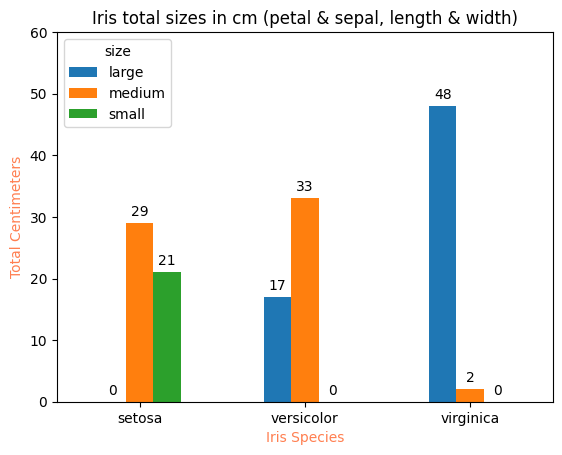

In [ ]:
# 28, Make a bar chart of 3 3-part bars (9 bars in clusters of 3)
bars = species_by_size_df.plot(kind="bar")

plt.title("Iris total sizes in cm (petal & sepal, length & width)")
plt.ylabel("Total Centimeters", color='coral')
plt.xlabel("Iris Species", color='coral')
plt.xticks(rotation=0)
plt.ylim(0,60)

# 29. Loop and label the bars with their numeric values
for bar in bars.containers:
  # plt.bar_label(bar,padding=3)
  plt.bar_label(bar, padding=3, fmt='%.0f', labels=[f'{int(v):,}' for v in bar.datavalues])

# 30. Save the chart as an image file to images folder:
plt.savefig("../images/iris-species-sizes-compared.png")

plt.show()

**train_test_split()** divide data into randomized training and testing sets

In [ ]:
# 31. Make "Big X" for model training; these are petal L, W and sepal L, W
# exclude string columns 'target' and 'size' columns from the train/test sets
# also exclude 'target' as this is the value we want to predict
X = iris_df.loc[:,['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [ ]:
# 32. Output the Big X dataframe
print(X.shape) # (150, 4)
X.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 33. Make "Little y", which is the vector of "target" values
y = iris_df['target'] # values are all 0, 1 or 2

In [ ]:
# 34. Check out y, which is a 1D vector Series
print(y.shape, type(y)) # (150,) <class 'pandas.core.series.Series'>
print(y[:5])

(150,) <class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


**train_test_split()**
- divides data into training and testing sets
- divides each set into features (X) and target (y)
- test_size=0.2 means 20% of the data will be used for testing
- the other 80% will be used for training

**X** = the full set of input features (petal/sepal length and width)

**y** = the full set of target labels (the numbers of the species: 0,1,2)

- The function splits X and y in the same way, but randomizes them
- Each input sample in X_train matches its correct label in y_train.

**Variable	Meaning**
- **X_train**	Features used to train the model
- **X_test**	Features used to test the model
- **y_train**	Labels (targets) used to train
- **y_test**	Labels used to evaluate predictions

- **test_size=0.2** → 20% of the data goes to the test set

- **random_state=42** → sets the random seed, so the same split happens every time (makes your results reproducible)

In [ ]:
# 35. Divide the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# 36. Check out X_train:
print(X_train.shape) # (120, 4)
X_train.head(2)

(120, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4


In [ ]:
# 37. Check out y_train:
print(y_train.shape) # (120,)
print(y_train[:3])

(120,)
22    0
15    0
65    1
Name: target, dtype: int64


In [ ]:
# 37. Check out X_test:
print(X_test.shape) # (30, 4)
X_test.head(2)

(30, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3


In [ ]:
# 38. Check out y_test:
print(y_test.shape) # (30,)
print(y_test[:3])

(30,)
73     1
18     0
118    2
Name: target, dtype: int64


**instantiate knn (k-nearrest neighbor) classifier model**

In [ ]:
# 39. Instantiate a knn model, set to 3 nearest neighbors
#     if n_neighbors parameter is omitted, it defaults to 5
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 40. Train the knn model by passing it the training data X and y:
# these are the 4 independent variables as well as the correct labels
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# 41. Have the model predict the answers (y) to the testing data "questions":
y_predictions = knn_model.predict(X_test)
print('model y_predictions:', y_predictions)
print('correct vals y_test:', np.array(y_test))

model y_predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
correct vals y_test: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
# 42. Get the score; how well did the model do? (1.0 is perfect)
accuracy_score = knn_model.score(X_test,y_test)
print(accuracy_score)
# L@@K: the model classified 29 out of 30 test samples correctly (29/30 = 0.9667)

1.0
